The task in this notebook is mortality prediction on 48hrs using physiological variables.

The positive class is in-hospital mortality and the negative survival.

We define the preprocessing, training, and test classes in python and pytorch, as well as, hyperparameters.
You have to complete the code and answer questions for the following exercises. Note: you can use the toy lstm model as an example to comple this notebook.

## Exercises

1. Understand the data and basic preprocessing
   - Read the file `test_text_data_2/train/20/episode1_timeseries_264490.csv` (after having extracted data files from the original archive) using a DataFrame
    - What do those data represent? E.g. how many patients? How many variables? Which specific patients? Can you name some specific variables and which kind of variables are (static, temporal, categorical, numerical, etc.)?
   - Plot the glucose, heart rate, mean blood pressure, and glasgow coma scale total variables from such file
   - On the basis of the previous plot as well as inspecting/displaying the whole data (from the DataFrame) what can you observe? Notably:
      - Are there any missing values? For which variables? How could they be handled?
      - What can you tell on the scales of the different numerical variables?
      - Are there any uncommonly high/low values? What do they represent? How could they be handled?
      - Do different elements in the serie (i.e. different measurements of each variable) occur at regular or irregular time intervals? Could this be a problem for a model? Why?
      - Hint: you can also use the DataFrame [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method.
   - Compare different data preprocessing techniques for different issues
    - Print the data after deleting missing values vs imputing them. What do you notice?
      - Hint: for deleting missing values you can use the DataFrame [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) method
      - After using `dropna()` on the whole dataframe try also to first remove the capillary refill rate and fraction inspired oxygen variables (`df[df.columns.difference(['Capillary refill rate', 'Fraction inspired oxygen'])]`)
      - Use 3 imputation variants mode, mean, and last previous value known. Focus on the variable mean blood pressure for imputation (and comparison)
        - Hint: you can use the Dataframe [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) and [ffill()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ffill.html)
      - Try also the KNN imputation
    - Change the value of mean blood pressure to 650 for the 11th element of the serie (`df.loc[10, 'Mean blood pressure']`) and to 6 for the 12th element of the serie (`df.loc[11, 'Mean blood pressure']`). What these 2 outliers may represent?
    - Print the data after deleting outliers for the `Mean blood pressure` (consider outliers values >150 or < 53) vs capping them (both low and high values, at any quantile). What do you notice? Can you cap all the variables? When capping what is happening when you change the upper/lower quantile used to cap the data?
2. Understand the code
   - Is normalization used in the given code?
   - Which imputation technique is used?
   - How irregular time intervals are managed in the given code?
   - Hint: look at the `timestep` and `imputation` arguments of the `train()` function as well as the `Discretizer` and `Normalizer` instantiation at the beginning of the `train()` function
3. For the mortality prediction model
   - Implement an architecture based on a LSTM
    - We defined the constructor of the classifier (to be implemented by you) with some indications on the layers that you can use in the comments
   - Implement the forward pass for the LSTM classifier
      - Note: use the mean on the ouputs of the lstm to aggerate features for the classifier       
   - Implement the training loop (epochs and minibatches)
   - Print the test results for all the metrics
   - Plot the training loss
   - Plot AUC and calibration curves (for test data)
4. Use the last hidden state of the LSTM as aggregation type instead of the mean
  - Compare AUC-ROC scores on the test data between LSTM with mean and last hidden state.
    - What do you observe when you use the last hidden state instead of the mean of all the outputs of the LSTM? Which one is better?
5. Use a GRU layer instead of the LSTM
  - Print test results for all metrics
  - Plot the AUC and calibration curves (for test data)
  - Plot training loss and compare it with LSTM.
    - What do you observe, does the GRU converges faster?
  - Compare AUC-ROC and AUC-PR scores on test data between LSTM and GRU models
    - What do you observe when you use a different sequence model? Which one is better?
  - Plot the AUC and calibration curves for both models together
6. Implement model selection for the validation data based on the AUC-ROC score for the LSTM model
  - Print test results for all metrics with best model on AUC-ROC score
  - Compare the AUC-ROC and AUC-PR scores with the test data for the LSTM model with and without model selection
    - What do you observe when you use a model trained given the best performance score in validation?
  - Plot the AUC and calibration curves for both models together
  - Implement an early stopping strategy (with some patience parameter)


## Download data

Save the MIMIC preprocess data in your google drive.
The following code is going to upload it into colab from your drive.

In [ ]:
#dowload csv files from gdrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
# ask google for authorization
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#download file from gdrive with the id for share file
# create share link for the tar.gz file  and copy id for example:
#https://drive.google.com/file/d/1E279yz7ZiZmok6qOYWlrWku1w7F13T5Q/view?usp=sharing
file_id = '1E279yz7ZiZmok6qOYWlrWku1w7F13T5Q' # URL id.
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('test_text_data_2.tar.gz')

In [ ]:
#extract data
!tar -xzf test_text_data_2.tar.gz

In [ ]:
#upload the discretizer_config.json
#this code loads the discretizer_config.json from your hard drive
# the config files and mimic utils are in the practical-mortality-utils.zip file
from google.colab import files
uploaded = files.upload()

Saving discretizer_config.json to discretizer_config.json


In [ ]:
#upload the norm_start_time_zero.normalizer
from google.colab import files
uploaded = files.upload()

Saving norm_start_time_zero.normalizer to norm_start_time_zero.normalizer


## upload utils
**Upload mimic_utils_text.py**
For reading csv, normalize data, and missing data imputation.
The imputation techinique is using the previous value, there are other imputation methods avilable.

To learn more on data normalization see [this tutorial](https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0) and for imputation see [here](https://medium.com/@Cambridge_Spark/tutorial-introduction-to-missing-data-imputation-4912b51c34eb).

In [ ]:
#upload mimic_utils_text.py
from google.colab import files
uploaded = files.upload()

Saving mimic_utils_text.py to mimic_utils_text.py


## Import libraries

In [1]:
#import main python and pytorch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import codecs
import os
import sys
import numpy as np
import logging
import tempfile
import shutil
import pickle
import platform
import json
from datetime import datetime
import random
#from __future__ import absolute_import
#from __future__ import print_function
from sklearn import metrics
from mimic_utils_text import InHospitalMortalityReader, Discretizer, Normalizer, read_chunk

# For the data understanding and preprocessing exercises
import pandas as pd

# Figures for ROC and calibration curve
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn import metrics

## Pytorch Dataset


In [2]:
# pytroch class for reading data into batches
class MIMICDataset(Dataset):
    """
       Loads time serie data into memory from a text file,
       split by newlines.
    """
    def __init__(self, reader, discretizer, normalizer, target_repl=False, batch_labels=False):
        self.data = []
        self.y  = []
        N = reader.get_number_of_examples()
        #if small_part:
        #    N = 1000
        # read data form cvs files
        ret = read_chunk(reader, N)
        # read into memory structured data X and labels y
        data = ret["X"]
        ts = ret["t"]
        labels = ret["y"]
        names = ret["name"]
        # runs discretizer and normalization
        data = [discretizer.transform(X, end=t)[0] for (X, t) in zip(data, ts)]
        if normalizer is not None:
            data = [normalizer.transform(X) for X in data]
        self.data = np.array(data, dtype=np.float32)
        self.T = self.data.shape[1]
        if batch_labels:
            self.y = np.array([[l] for l in labels], dtype=np.float32)
        else:
            self.y = np.array(labels, dtype=np.float32)
        if target_repl:
            self.y = self._extend_labels(self.y)

    def _extend_labels(self, labels):
        # (B,)
        labels = labels.repeat(self.T, axis=1)  # (B, T)
        return labels

    def __len__(self):
        # overide len to get number of instances
        return len(self.data)

    def __getitem__(self, idx):
        # get features (physiological variables x) and label for a given instance index
        return self.data[idx], self.y[idx]

## Evaluation metrics
The main measure used are [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy), [ROC AUC and PR AUC](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/).

To know more on evaluating prognostic models you can watch [this](https://www.youtube.com/watch?v=B4dFjWEpRnY&list=PLx7eKEyZ1cjTfr-SDKkwmuYmrrgryjTC0&index=2) video.

In [3]:
# eval metrics
def print_metrics_binary(y_true, predictions, logging, verbose=1):
    predictions = np.array(predictions)
    if len(predictions.shape) == 1:
        predictions = np.stack([1 - predictions, predictions]).transpose((1, 0))
    cf = metrics.confusion_matrix(y_true, predictions.argmax(axis=1))
    if verbose:
        logging.info("confusion matrix:")
        logging.info(cf)
    cf = cf.astype(np.float32)

    acc = (cf[0][0] + cf[1][1]) / np.sum(cf)
    prec0 = cf[0][0] / (cf[0][0] + cf[1][0])
    prec1 = cf[1][1] / (cf[1][1] + cf[0][1])
    rec0 = cf[0][0] / (cf[0][0] + cf[0][1])
    rec1 = cf[1][1] / (cf[1][1] + cf[1][0])
    auroc = metrics.roc_auc_score(y_true, predictions[:, 1])

    (precisions, recalls, thresholds) = metrics.precision_recall_curve(y_true, predictions[:, 1])
    auprc = metrics.auc(recalls, precisions)
    minpse = np.max([min(x, y) for (x, y) in zip(precisions, recalls)])

    if verbose:
        logging.info("accuracy = {0:.3f}".format(acc))
        logging.info("precision class 0 = {0:.3f}".format(prec0))
        logging.info("precision class 1 = {0:.3f}".format(prec1))
        logging.info("recall class 0 = {0:.3f}".format(rec0))
        logging.info("recall class 1 = {0:.3f}".format(rec1))
        logging.info("AUC of ROC = {0:.3f}".format(auroc))
        logging.info("AUC of PRC = {0:.3f}".format(auprc))


    return {"acc": acc,
            "prec0": prec0,
            "prec1": prec1,
            "rec0": rec0,
            "rec1": rec1,
            "auroc": auroc,
            "auprc": auprc}

## Understanding the data and basic preprocessing

Text(0.5, 1.0, 'Measurements of glucose, Heart Rate, Mean blood pressure, Glascow coma scale total over hours')

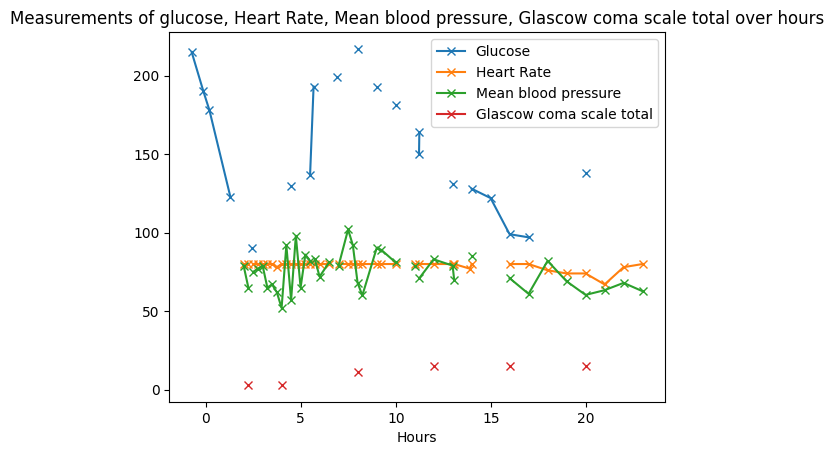

In [23]:
# Add your code here (add any number of cell you may need)
df = pd.read_csv('test_text_data_2/train/20/episode1_timeseries_264490.csv')

# Plot some variables
x = df['Hours']
y = df[['Glucose', 'Heart Rate', 'Mean blood pressure', 'Glascow coma scale total']]

# plot glucose
plt.plot(x,y['Glucose'], marker='x', label='Glucose')
plt.plot(x,y['Heart Rate'], marker='x', label='Heart Rate')
plt.plot(x,y['Mean blood pressure'], marker='x', label='Mean blood pressure')
plt.plot(x,y['Glascow coma scale total'], marker='x', label='Glascow coma scale total')
plt.legend()
plt.xlabel('Hours')
plt.title('Measurements of glucose, Heart Rate, Mean blood pressure, Glascow coma scale total over hours')
# Add more plots

In [14]:
df.describe()

,Hours,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale total,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
count,51.000000,0.0,40.000000,0.0,6.000000,20.000000,41.000000,0.0,40.000000,42.000000,40.000000,40.00000,35.000000,1.000000,9.00000
mean,8.568431,NaN,54.500000,NaN,10.333333,153.750000,79.121951,NaN,75.058333,98.476190,15.250000,127.82500,36.545715,93.300003,7.41000
std,6.160175,NaN,9.055385,NaN,5.887841,39.837664,2.461657,NaN,11.734453,1.742413,5.673827,20.86942,0.539794,NaN,0.04717
min,-0.743333,NaN,36.000000,NaN,3.000000,90.000000,67.000000,NaN,52.000000,95.000000,0.000000,81.00000,35.900002,93.300003,7.34000
25%,3.865000,NaN,50.000000,NaN,5.000000,126.750000,80.000000,NaN,65.000000,97.000000,10.000000,109.00000,36.000002,93.300003,7.38000
50%,6.990000,NaN,54.500000,NaN,13.000000,144.000000,80.000000,NaN,76.000000,99.000000,16.000000,129.00000,36.299999,93.300003,7.43000
75%,12.490000,NaN,60.500000,NaN,15.000000,190.750000,80.000000,NaN,82.250000,100.000000,19.000000,144.00000,37.150000,93.300003,7.43000
max,22.990000,NaN,76.000000,NaN,15.000000,217.000000,80.000000,NaN,102.000000,100.000000,27.000000,167.00000,37.300000,93.300003,7.48000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hours                               51 non-null     float64
 1   Capillary refill rate               0 non-null      float64
 2   Diastolic blood pressure            40 non-null     float64
 3   Fraction inspired oxygen            0 non-null      float64
 4   Glascow coma scale eye opening      6 non-null      object 
 5   Glascow coma scale motor response   6 non-null      object 
 6   Glascow coma scale total            6 non-null      float64
 7   Glascow coma scale verbal response  6 non-null      object 
 8   Glucose                             20 non-null     float64
 9   Heart Rate                          41 non-null     float64
 10  Height                              0 non-null      float64
 11  Mean blood pressure                 40 non-null

In [25]:
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Hours                                  0
Capillary refill rate                 51
Diastolic blood pressure              11
Fraction inspired oxygen              51
Glascow coma scale eye opening        45
Glascow coma scale motor response     45
Glascow coma scale total              45
Glascow coma scale verbal response    45
Glucose                               31
Heart Rate                            10
Height                                51
Mean blood pressure                   11
Oxygen saturation                      9
Respiratory rate                      11
Systolic blood pressure               11
Temperature                           16
Weight                                50
pH                                    42
dtype: int64


This dataframe is about the measurements over hours of one patient.

In [13]:
directory = 'test_text_data_2/train/'
i = 0
for item in directory:
    i += 1
print('There are in total', i, 'patients in the train data')

There are in total 23 patients in the train data


In [35]:
# Mode imputation
df_imputed_mode = df.fillna(value={'Mean blood pressure':df['Mean blood pressure'].mode()[0]})
df_imputed_mode

# Impute using mean and the last previous value known

,Hours,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,-0.743333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215.0,NaN,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,7.43
1,-0.126667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,NaN,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,7.43
2,0.190000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0,NaN,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,7.38
3,1.290000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,7.34
4,1.990000,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,79.000000,100.0,12.0,121.0,36.000002,93.300003,NaN
5,2.240000,NaN,50.0,NaN,1 No Response,1 No Response,3.0,1.0 ET/Trach,NaN,80.0,NaN,65.000000,100.0,11.0,103.0,36.000002,NaN,NaN
6,2.406667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,7.43
7,2.490000,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,75.000000,100.0,10.0,130.0,35.900002,NaN,NaN
8,2.740000,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,77.000000,97.0,10.0,126.0,36.000002,NaN,NaN
9,2.990000,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,79.000000,97.0,10.0,129.0,35.900002,NaN,NaN


In [37]:
# Mean imputation
df_imputed_mean = df.fillna(value={'Mean blood pressure':df['Mean blood pressure'].mean()})
df_imputed_mean


,Hours,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,-0.743333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215.0,NaN,NaN,75.058333,NaN,NaN,NaN,NaN,NaN,7.43
1,-0.126667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,NaN,NaN,75.058333,NaN,NaN,NaN,NaN,NaN,7.43
2,0.190000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0,NaN,NaN,75.058333,NaN,NaN,NaN,NaN,NaN,7.38
3,1.290000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,75.058333,NaN,NaN,NaN,NaN,NaN,7.34
4,1.990000,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,79.000000,100.0,12.0,121.0,36.000002,93.300003,NaN
5,2.240000,NaN,50.0,NaN,1 No Response,1 No Response,3.0,1.0 ET/Trach,NaN,80.0,NaN,65.000000,100.0,11.0,103.0,36.000002,NaN,NaN
6,2.406667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,75.058333,NaN,NaN,NaN,NaN,NaN,7.43
7,2.490000,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,75.000000,100.0,10.0,130.0,35.900002,NaN,NaN
8,2.740000,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,77.000000,97.0,10.0,126.0,36.000002,NaN,NaN
9,2.990000,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,79.000000,97.0,10.0,129.0,35.900002,NaN,NaN


In [42]:
# Last previous value known imputation
df_imputed_lastpreviousvalue = df
df_imputed_lastpreviousvalue['Mean blood pressure'].fillna(method='ffill', inplace=True)
df_imputed_lastpreviousvalue

,Hours,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
0,-0.743333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.43
1,-0.126667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.43
2,0.190000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.38
3,1.290000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.34
4,1.990000,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,79.000000,100.0,12.0,121.0,36.000002,93.300003,NaN
5,2.240000,NaN,50.0,NaN,1 No Response,1 No Response,3.0,1.0 ET/Trach,NaN,80.0,NaN,65.000000,100.0,11.0,103.0,36.000002,NaN,NaN
6,2.406667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,7.43
7,2.490000,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,75.000000,100.0,10.0,130.0,35.900002,NaN,NaN
8,2.740000,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,77.000000,97.0,10.0,126.0,36.000002,NaN,NaN
9,2.990000,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,79.000000,97.0,10.0,129.0,35.900002,NaN,NaN


In [28]:
df_deletedmissing = df.dropna()
df_deletedmissing

,Hours,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH


After using dropna() over the dataframe, all rows will be dropped since each row contains a missing value in some variable.

In [30]:
df_deleting = df[df.columns.difference(['Capillary refill rate', 'Fraction inspired oxygen'])]
df_deleting = df_deleting.dropna()
df_deleting

,Diastolic blood pressure,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Hours,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH


After removing the capillary refill rate and fraction innspired ocigen variables, using dropna() over the dataframe, still all rows will be dropped since each row contains a missing value in some variable.

In [48]:
# Comparing deleting outliers vs capping them:
# Change the value of mean blood pressure to 650 for the 11th element
# and to 6 for the 12th element of the serie
df.loc[10, 'Mean blood pressure'] = 650
df.loc[11, 'Mean blood pressure'] = 6

In [47]:
# Deleting outliers of mean blood pressure >150 and <53
df_remove_outliers = df[(df['Mean blood pressure'] < 150) & (df['Mean blood pressure'] > 53)]
df_remove_outliers

,Hours,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH
4,1.990000,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,79.000000,100.0,12.0,121.0,36.000002,93.300003,NaN
5,2.240000,NaN,50.0,NaN,1 No Response,1 No Response,3.0,1.0 ET/Trach,NaN,80.0,NaN,65.000000,100.0,11.0,103.0,36.000002,NaN,NaN
6,2.406667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,7.43
7,2.490000,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,75.000000,100.0,10.0,130.0,35.900002,NaN,NaN
8,2.740000,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,77.000000,97.0,10.0,126.0,36.000002,NaN,NaN
9,2.990000,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,79.000000,97.0,10.0,129.0,35.900002,NaN,NaN
12,3.740000,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,62.000000,100.0,10.0,99.0,36.100002,NaN,NaN
14,4.240000,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,92.000000,100.0,10.0,144.0,36.000002,NaN,NaN
15,4.490000,NaN,45.0,NaN,NaN,NaN,NaN,NaN,130.0,80.0,NaN,57.000000,99.0,10.0,90.0,36.000002,NaN,NaN
16,4.740000,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,98.000000,100.0,10.0,156.0,36.100002,NaN,NaN


## Training

Here we define the model, loss and training loop.

The model is an LSTM. You can learn more on LSTM [here](https://colah.github.io/posts/2015-08-Understanding-LSTMs/).

In [ ]:
#model
class LSTMClassifier(nn.Module):

    def __init__(self, tag_size, hidden_size,feat_size, emb_size,
                 bidirectional=True, dropout=0.2, aggregation_type='mean'):
        """
        constructor, here we define the hidden layers for our architecture
        """
        super().__init__()
        # define if the rnn will be bidirectional --> check

        # define the aggregation type of the features for the classifier for example, you can take the mean

        #define an encoder linear layer

        self.layer1 = nn.Linear(feat_size, emb_size) # What sizes?

        # Create a (bidirectional) LSTM to encode sequence

        # The output of the LSTM doubles if we use a bidirectional encoder.
        # we have the forward and backward hidden states

        # define a combination linear layer to use in the aggregation

        self.combination = nn.Linear(emb_size, hidden_size)

        # Create affine layer to project to the classes
        self.out = nn.Linear(hidden_size, tag_size)

        # dropout layer for regularizetion of a sequence --> check
        self.dropout = nn.Dropout(dropout)

        #non linear activation layer (ReLU) --> check added ReLu layer
        self.relu = nn.ReLU()


    def forward(self, x, seq_mask=None, seq_len=None):

        # Your code here
        h1 = self.layer1(x)
        # input size
        # [B, T, feat_size] batch, time and features
        # return unormalized probabilities (logits)
        # the loss will compute the sigmoid and negative log-likelihood
        #output size
        # [B, num_class] batch, and 1 class

        return logits

In [ ]:
#eval model
def eval_model(model, dataset, device):
    model.eval() # the model will not update parameters or perfom dropout
    sigmoid = nn.Sigmoid()
    with torch.no_grad(): # the model will not update parameters
        y_true = []
        predictions = []
        for data, labels in dataset:
            data = data.to(device)
            labels = labels.to(device)
            logits = model(data)
            probs = sigmoid(logits) #compute probabilities
            #_, predicted = torch.max(probs.data, 1)
            #y_hat_class = np.where(probs.data<0.5, 0, 1)
            predictions += [p.item() for p in probs] #concatenate all predictions
            y_true += [y.item() for y in labels] #concatenate all labels
    #print(predictions)
    #print(y_true)
    results = print_metrics_binary(y_true, predictions, logging)
    # retunrn results, predcitions (probs), and labels
    return results, predictions, y_true

In [ ]:
def train(args):
  mode = 'train'
  hidden_size = args['dim']
  dropout = args['dropout']
  batch_size = args['batch_size']
  learning_rate = args['lr']
  num_epochs = args['epochs']
  emb_size = args['emb_size']
  aggregation_type = args['aggregation_type']
  bidirectional_encoder = args['bidirectional']
  seed = args['seed']
  steps = args['steps']
  data = args['data']
  notes = args['notes']
  timestep = args['timestep']
  normalizer_state = args['normalizer_state']
  if seed: #reproducibility
      torch.manual_seed(seed)
      np.random.seed(seed)
  device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

  logging.basicConfig(level=logging.INFO,
          format='%(asctime)s %(message)s',
          datefmt='%Y-%m-%d %H:%M:%S',
          )
  # define cvs data readers
  # this will load data into memory
  train_reader = InHospitalMortalityReader(dataset_dir=os.path.join(data, 'train'),
                                           notes_dir=notes,
                                           listfile=os.path.join(data, 'train_listfile.csv'),
                                           period_length=48.0)

  val_reader = InHospitalMortalityReader(dataset_dir=os.path.join(data, 'train'),
                                         notes_dir=notes,
                                       listfile=os.path.join(data, 'val_listfile.csv'),
                                       period_length=48.0)

  # define discrtizer for imputation, and normalization
  discretizer = Discretizer(timestep=float(timestep),
                          store_masks=True,
                          impute_strategy='previous',
                          start_time='zero')

  discretizer_header = discretizer.transform(train_reader.read_example(0)["X"])[1].split(',')
  cont_channels = [i for (i, x) in enumerate(discretizer_header) if x.find("->") == -1]

  normalizer = Normalizer(fields=cont_channels)  # choose here which columns to standardize
  normalizer_state = normalizer_state
  if normalizer_state is None:
      normalizer_state = 'norm_start_time_zero.normalizer'


  normalizer.load_params(normalizer_state)

  # read data for pytorch training data
  # here we create the mini batches and load into memory
  train_dataset = MIMICDataset(train_reader, discretizer, normalizer, batch_labels=True)
  train_dl = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  #read validation data
  val_dataset = MIMICDataset(val_reader, discretizer, normalizer, batch_labels=True)
  val_dl = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
  #[B, T, feat_size] batch, time, and num of variables
  feat_size = train_dataset.data.shape[-1]

  # Define the classification model
  model = LSTMClassifier(tag_size=1, #binary
                    feat_size= feat_size,
                    hidden_size=hidden_size,
                    emb_size=emb_size,
                    bidirectional=bidirectional_encoder,
                    dropout=dropout,
                    aggregation_type=aggregation_type)

  model = model.to(device)
  logging.info(args)
  logging.info(model)

  # Define optimizer
  optimizer = Adam(model.parameters(), lr=learning_rate)

  # define loss for binary classification
  # binary cross-entropy
  criterion = nn.BCEWithLogitsLoss()

  # path to save model with extension .pt on disk
  save_model = 'rnn_model.pt'
  best_val_auc = 0.

  results = []

  step = 0
  num_batches = 0
  #training loop
  # Your code here
  # loop over epochs
  #for epoch...

    # loop over mini-batches
    #for batch...
    #example to call minibatches form our dataset train_dl
    #for x, labels in train_dl: #iterates over train_dl and returns X variables and y labels
      # data and labels into device
      # Model is in training mode (for dropout).
      # run forward
      # keep track of loss
      # Backpropagate and update the model weights.
      # Every number of steps show the model loss
      if step % steps == 0:
          logging.info("epoch (%d) step %d: training loss = %.2f"%
              (epoch_num, step, loss_batch/num_batches))
    # Progess on validation data after every epoch
    metrics_results, _, _ = eval_model(model,
                                  val_dl,
                                  device)
    metrics_results['epoch'] = epoch_num
    # save results of current epoch
    results.append(metrics_results)

    #Model selection
    #your code here
    # save best model to disk


In [ ]:
#execute training
#define hyperparameters

args = {'dim':16,
        'dropout':0.3,
        'batch_size':8,
        'lr':1e-3,
        'epochs':20,
        'emb_size':16,
        'aggregation_type':'mean',
        'bidirectional':False, #we are not going to use biRNN
        'seed':42,
        'steps':50, # print loss every num of steps
        'data':'test_text_data_2/in-hospital-mortality', # path to MIMIC data
        'notes':'test_text_data_2/train', # code ignores text
        'timestep':1.0, # observations every hour
        'imputation':'previous', # imputation method
        'normalizer_state':None} # we use normalization config
train(args)

## Test

Here we use the last trained model or the best validation model   and run in test.

In addition to the measures introduced above we also use [calibration curves](https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html).

In [ ]:
#test

def test(args):
    # define trainning and validation datasets
    mode = 'test'
    hidden_size = args['dim']
    dropout = args['dropout']
    batch_size = args['batch_size']
    emb_size = args['emb_size']
    best_model = args['best_model']
    data = args['data']
    notes = args['notes']
    timestep = args['timestep']
    aggregation_type = args['aggregation_type']
    bidirectional_encoder = args['bidirectional'] # TODO add into args
    device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
    # 1. Get a unique working directory

    logging.basicConfig(level=logging.INFO,
            format='%(asctime)s %(message)s',
            datefmt='%Y-%m-%d %H:%M:%S')



    test_reader = InHospitalMortalityReader(dataset_dir=os.path.join(data, 'test'),
                                           notes_dir=notes,
                                         listfile=os.path.join(data, 'test_listfile.csv'),
                                         period_length=48.0)


    discretizer = Discretizer(timestep=float(timestep),
                          store_masks=True,
                          impute_strategy='previous',
                          start_time='zero')

    discretizer_header = discretizer.transform(test_reader.read_example(0)["X"])[1].split(',')
    cont_channels = [i for (i, x) in enumerate(discretizer_header) if x.find("->") == -1]

    normalizer = Normalizer(fields=cont_channels)  # choose here which columns to standardize
    normalizer_state = args['normalizer_state']
    if normalizer_state is None:
        normalizer_state = 'norm_start_time_zero.normalizer'
    normalizer.load_params(normalizer_state)

    # Read data
    test_dataset = MIMICDataset(test_reader, discretizer, normalizer, batch_labels=True)
    test_dl = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    #[B, M, feat_size]
    feat_size = test_dataset.data.shape[-1]


    # Define the classification model.
    model = LSTMClassifier(tag_size=1, #binary
                    feat_size= feat_size,
                    hidden_size=hidden_size,
                    emb_size=emb_size,
                    bidirectional=bidirectional_encoder,
                    dropout=dropout,
                    aggregation_type=aggregation_type)
    #load trained model from file
    model.load_state_dict(torch.load(best_model))
    logging.info(model)
    model = model.to(device)

    metrics_results, pred_probs, y_true = eval_model(model,
                                test_dl,
                                device)
    return metrics_results, pred_probs, y_true


In [ ]:
# Run test on saved model *.pt
# remember to use the same hyperparameters as in training
args = {'best_model':'',
        'dim':16,
        'dropout':0.3,
        'batch_size':16,
        'emb_size':16,
        'aggregation_type':'mean',
        'bidirectional':False,
        'data':'test_text_data_2/in-hospital-mortality', #path to data
        'notes':'test_text_data_2/test', #the code ignores the text
        'timestep':1.0,
        'imputation':'previous',
        'normalizer_state':None}
metrics_results, pred_probs, y_true = test(args)

# Assess predictive performance

In [ ]:
# Plot roc curve
lstm_fpr, lstm_tpr, lstm_thresholds = metrics.roc_curve(y_true, pred_probs)

# plot the roc curve for the model
plt.figure()
plt.ylim(0., 1.0)
plt.xlim(0.,1.0)
plt.plot(lstm_fpr, lstm_tpr, marker='.', label='LSTM', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()

In [ ]:
# Plot calibration curve
lstm_y, lstm_x = calibration_curve(y_true, pred_probs, n_bins=10)
plt.figure()
plt.ylim(0., 1.0)
plt.xlim(0.,1.0)
# only these two lines are calibration curves
plt.plot(lstm_x,lstm_y, marker='^', linestyle="", markersize=7, label='LSTM', color='darkorange')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.legend()
plt.show()